In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.8.0
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\Sou\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


In [5]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4200      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 9,771
Trainable params: 9,771
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [7]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
943/943 [==============================] - 2s 1ms/step - loss: 0.4414 - accuracy: 0.7899 - val_loss: 0.4020 - val_accuracy: 0.7855
Epoch 2/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3804 - accuracy: 0.8087 - val_loss: 0.3739 - val_accuracy: 0.8080
Epoch 3/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3760 - accuracy: 0.8112 - val_loss: 0.3694 - val_accuracy: 0.8114
Epoch 4/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3736 - accuracy: 0.8128 - val_loss: 0.3706 - val_accuracy: 0.8153
Epoch 5/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3723 - accuracy: 0.8134 - val_loss: 0.3754 - val_accuracy: 0.8074
Epoch 6/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3708 - accuracy: 0.8147 - val_loss: 0.3737 - val_accuracy: 0.8135
Epoch 7/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3702 - accuracy: 0.8129 - val_loss: 0.3738 - val_accuracy: 0.8120
Epoch 

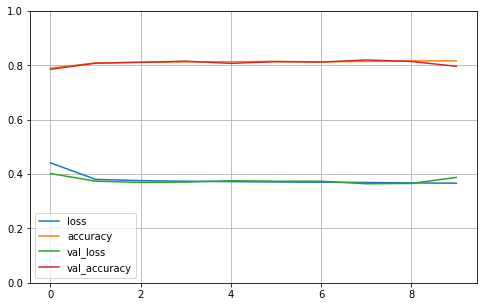

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 1s 1ms/step - loss: 0.3876 - accuracy: 0.7965


[0.3876429796218872, 0.7964807152748108]

In [12]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test), axis=-1) )

0.7543160690571049

# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
history2 = model.fit(X_train_scaled, y_train, validation_data= (X_test_scaled, y_test), batch_size=32, epochs=10)

Epoch 1/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3748 - accuracy: 0.8241 - val_loss: 0.3370 - val_accuracy: 0.8444
Epoch 2/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3298 - accuracy: 0.8457 - val_loss: 0.3306 - val_accuracy: 0.8448
Epoch 3/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3246 - accuracy: 0.8473 - val_loss: 0.3300 - val_accuracy: 0.8449
Epoch 4/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3222 - accuracy: 0.8481 - val_loss: 0.3272 - val_accuracy: 0.8467
Epoch 5/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3203 - accuracy: 0.8505 - val_loss: 0.3270 - val_accuracy: 0.8477
Epoch 6/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3184 - accuracy: 0.8511 - val_loss: 0.3236 - val_accuracy: 0.8471
Epoch 7/10
943/943 [==============================] - 1s 1ms/step - loss: 0.3166 - accuracy: 0.8513 - val_loss: 0.3230 - val_accuracy: 0.8480
Epoch 

In [14]:
model.evaluate(X_test_scaled, y_test)
metrics.accuracy_score(y_true= y_test, y_pred= np.argmax(model.predict(X_test_scaled), axis=-1))

471/471 [==============================] - 0s 670us/step - loss: 0.3213 - accuracy: 0.8508


0.7543160690571049

# Zad. 
Stwórz wykres porównujący metody. 

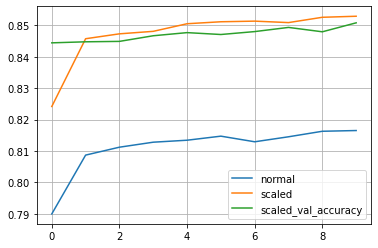

In [19]:
plt.plot(pd.DataFrame(history.history['accuracy']), label='normal')
plt.plot(pd.DataFrame(history2.history['accuracy']), label='scaled')
plt.plot(pd.DataFrame(history2.history['val_accuracy']), label='scaled_val_accuracy')
plt.grid(True)
plt.legend()
plt.show()